In [1]:
import numpy as np
import os
from PIL import Image

Reading the images, lables and filepaths in an array

In [2]:
folder="C://Users//LENOVO//OneDrive//Desktop//IntelliPaat//EDA CSV files//Cats_and_Dogs_Dataset"
img_width, img_height, img_channel=32,32,3

In [3]:
subfolders=['Cat500','Dog500']
filepaths, data, labels=[], [], []
for subfolder_index, subfolder in enumerate(subfolders):
    for file in os.listdir(os.path.join(folder,subfolder)):
        img_path=os.path.join(folder, subfolder,file)
        filepaths.append(img_path)
        img=Image.open(img_path)
        data.append(np.array(img.resize((img_width,img_height))).astype('float32')/255)
        labels.append(subfolder_index)

In [4]:
data=np.asarray(data)

In [5]:
data.shape

(1000, 32, 32, 3)

In [6]:
labels=np.asarray(labels)

Preparing Test, Train Dataset. 

Reshaping Input Dataset

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 32, 32, 3), (200, 32, 32, 3), (800,), (200,))

In [9]:
# x_train = x_train.astype('float32')/255
# x_test = x_test.astype('float32')/255

Model Creation

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.layers import Dense, Input, Conv2D,  Dropout, RandomRotation, RandomZoom, BatchNormalization, Flatten

In [11]:
model=Sequential([
    layers.Input(shape=(img_width,img_height,img_channel)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    layers.Conv2D(64,(5,5),activation='relu'),
    # layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.25),
    
    layers.Conv2D(64,(5,5), activation='relu'),
    # layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.25),
        
    # layers.Conv2D(32,(3,3),activation='relu'),
    # layers.BatchNormalization(),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.25),
    
    layers.Flatten(),
    
    layers.Dense(1024,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRot  (None, 32, 32, 3)         0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0

In [13]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# early_stopping=callbacks.EarlyStopping(patience=3,restore_best_weights=True)
# reducelr=callbacks.ReduceLROnPlateau(factor=0.1,patience=3)

In [15]:
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=True)

Epoch 1/10
25/25 [==============================] - 17s 368ms/step - loss: 0.7010 - accuracy: 0.5125
Epoch 2/10
25/25 [==============================] - 9s 377ms/step - loss: 0.6909 - accuracy: 0.5375
Epoch 3/10
25/25 [==============================] - 9s 370ms/step - loss: 0.6799 - accuracy: 0.5663
Epoch 4/10
25/25 [==============================] - 9s 358ms/step - loss: 0.6621 - accuracy: 0.6125
Epoch 5/10
25/25 [==============================] - 10s 408ms/step - loss: 0.6689 - accuracy: 0.6112
Epoch 6/10
25/25 [==============================] - 10s 402ms/step - loss: 0.6682 - accuracy: 0.5788
Epoch 7/10
25/25 [==============================] - 10s 401ms/step - loss: 0.6482 - accuracy: 0.6062
Epoch 8/10
25/25 [==============================] - 11s 431ms/step - loss: 0.6601 - accuracy: 0.5900
Epoch 9/10
25/25 [==============================] - 10s 384ms/step - loss: 0.6322 - accuracy: 0.6375
Epoch 10/10
25/25 [==============================] - 10s 381ms/step - loss: 0.6274 - accuracy:

In [16]:
model.evaluate(x_test, y_test, verbose=1)

7/7 [==============================] - 2s 92ms/step - loss: 0.6605 - accuracy: 0.6450


[0.6604830026626587, 0.6449999809265137]

In [17]:
y_predict=model.predict(x_test)

7/7 [==============================] - 1s 126ms/step


In [18]:
y_predict

array([[0.66508895],
       [0.34595793],
       [0.6649467 ],
       [0.53826404],
       [0.63815194],
       [0.6584093 ],
       [0.7945392 ],
       [0.6302333 ],
       [0.6247608 ],
       [0.6711319 ],
       [0.49699643],
       [0.3778084 ],
       [0.7255264 ],
       [0.6056122 ],
       [0.51448137],
       [0.5666925 ],
       [0.66002196],
       [0.7509664 ],
       [0.575428  ],
       [0.63369906],
       [0.52621925],
       [0.0169643 ],
       [0.7820997 ],
       [0.6920679 ],
       [0.6440849 ],
       [0.47557542],
       [0.33727196],
       [0.3422091 ],
       [0.54586893],
       [0.4346144 ],
       [0.35786396],
       [0.37864807],
       [0.6588957 ],
       [0.436884  ],
       [0.38156334],
       [0.4748047 ],
       [0.8068012 ],
       [0.6984176 ],
       [0.39122757],
       [0.20122719],
       [0.6368252 ],
       [0.07210713],
       [0.40658477],
       [0.58423984],
       [0.7075431 ],
       [0.46184057],
       [0.3896341 ],
       [0.427

In [19]:
model.save('cats_vs_dogs.keras')
print('model save completed')

model save completed


**Predicting the Outcome with one image from Dataset**

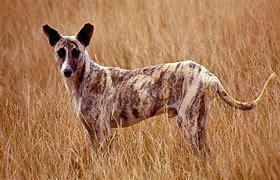

In [20]:
img=Image.open('C://Users//LENOVO//OneDrive//Pictures//Dog.jpeg')
img

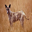

In [21]:
reduced_img=img.resize((img_width,img_height))
reduced_img

In [22]:
reduced_img.size

(32, 32)

In [23]:
reduced_img_arr=np.array(reduced_img)
reduced_img_arr.shape

(32, 32, 3)

In [24]:
reduced_img_arr = reduced_img_arr.astype('float32')/255
reduced_img_arr.shape
reduced_img_arr=reduced_img_arr.reshape((1,img_width,img_height,img_channel))

In [25]:
loaded_model= tf.keras.models.load_model('cats_vs_dogs.keras')  
y_predict=loaded_model.predict(reduced_img_arr)

1/1 [==============================] - 0s 376ms/step


In [26]:
y_predict

array([[0.5337669]], dtype=float32)

In [27]:
confidence=np.max(y_predict)
predicted_class=np.argmax(y_predict)
print('confidence = ',confidence)
print('predicted_class = ',predicted_class)
if (predicted_class==0):
    print('Cat')
else:
    print('Dog')

confidence =  0.5337669
predicted_class =  0
Cat


**Predicting a list of random images**

1/1 [==============================] - 0s 78ms/step


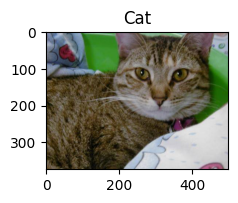

1/1 [==============================] - 0s 79ms/step


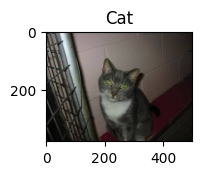

1/1 [==============================] - 0s 62ms/step


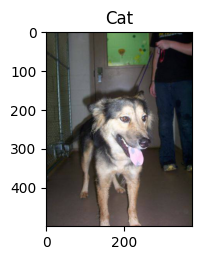

In [28]:
import random
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(3):
    x=random.randint(0,999)
    plt.subplot(1,3,i+1)
    img=Image.open(filepaths[x])
    plt.imshow(img)
    y_predict=loaded_model.predict((np.array(img.resize((img_width,img_height))).astype('float32')/255).reshape((1,img_width,img_height,img_channel)))
    predicted_class = 'Cat' if (np.argmax(y_predict)==0) else 'Dog'
    plt.title(predicted_class)
    plt.show()
       